In [1]:
from typing import List

In [20]:
def specialArray(nums: List[int]) -> int:
    ans = -1
    for x in range(1,len(nums)+1):
        match_count = 0
        for ele_nums in nums:
            if ele_nums>=x:
                match_count +=1

        if x == match_count:
            
            if  x in nums:
                return match_count
            else:
                
                ans = match_count
    return ans

In [4]:
nums = [0,4,3,0,4]
specialArray(nums)

# Approach 1: Brute force with binary search
* ⏰ Time complexity: O(n*log n), we use sorting (nlogn) and also for every num in range [1, n] we call binary search which is also O(nlogn)
* 🧺 Space complexity: O(1) no extra space is used
## Coding
The main point in this solution is to how to find number of elements greater then or equal efficiently.

* To find something efficiently we can use binary_search. This is it, we don't interested in the order of elements in array so we can just sort it and implement binary search to find out how many elements are greater than or equal to i
* Let's talk about binary search and consider a simple example.
    *  We don't want to find some element with binary search but rather number of elements greater or equal to i.
    * So, in fact, what we are interested in is the index of first element in array which is greater or equal to i because if array sorted and nums[j] >= i then nums[j + 1] >= i. (So we want to return the index of mid at the time we changed right pointer last time because we know for sure that nums[mid] >= cur_num)
* There's my image which exemplifies binary search algorithm for our situation.

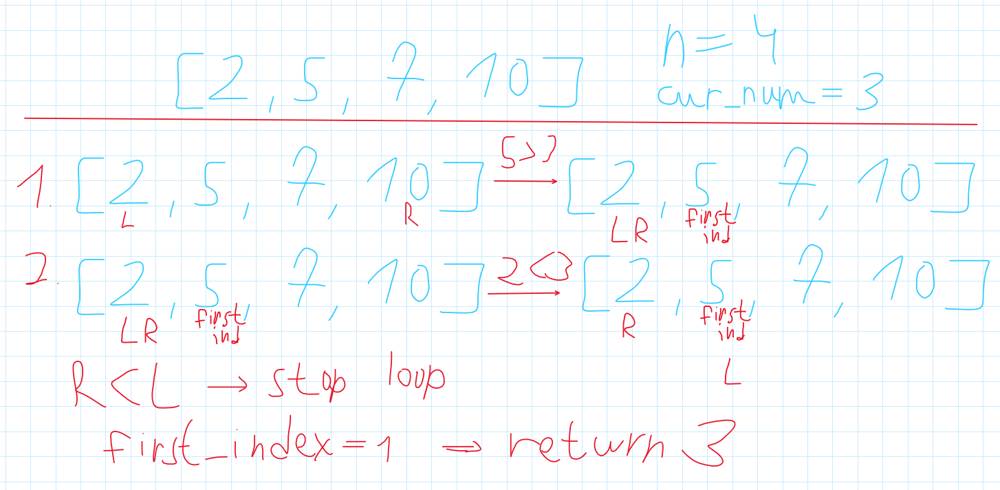

In [8]:
def specialArray(nums: List[int]) -> int:
    nums.sort()
    n= len(nums)

    def find_number_of_nums(cur_num) -> int:
        left= 0
        right= n - 1

        first_index= n
        while left <= right:
            mid = (left + right) // 2

            if nums[mid] >= cur_num:
                first_index = mid
                right = mid - 1
            else:
                left = mid + 1

        return n - first_index

    for candidate_number in range(1, n + 1, 1):
        if candidate_number == find_number_of_nums(candidate_number):
            return candidate_number

    return -1

In [9]:

specialArray(nums)

3

🧠 Approach 2: Suffix-sum with pretty logic
* ⏰ Time complexity: O(n), we iterate from 1 to n which is O(n) and also every num in array to store frequency which is O(n)
* 🧺 Space complexity: O(n), since we're creating array of size n + 1 (from 0 to n) which is O(n)
## Let's code this up

* Initialize array for frequency frequency (any number from [n, +inf] is the same as n so we will count this just to frequency[n]).
* Count every frequency with loop
* Iterate i from n to one and for every number add to num_greater_equal number of numbers which are equal to current i and on every step check whether current candidate for special number is equal to number of greater or equal.

In [11]:
def specialArray(nums: List[int]) -> int:
    n = len(nums)
    frequency = [0 for _ in range(n + 1)]  # frequence[i] means there is frequence[i] elements equal to i

    for num in nums:
        frequency[min(n, num)] += 1

    num_greater_equal = 0
    for candidate_number in range(n, 0, -1):
        num_greater_equal += frequency[candidate_number]
        if candidate_number == num_greater_equal:
            return candidate_number

    return -1

In [12]:
nums = [0,4,3,0,4]
specialArray(nums)

3